<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/python-logo.png" style="height: 100px;" align=right>

# Distributions
Day 2.1

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import norm, poisson, uniform, skew, kurtosis, iqr 

# Content Outline
1. [**Characterizing Distributions**](#distributions)
    * The Normal Distribution
    * Skewness
    * Kurtosis


2. [**Other Common Distributions**](#other)
    * The Poisson Distribution
    * The Uniform Distribution

# 1. Characterizing Distributions <a name="distributions"></a>
Recall that in **exploratory data analysis**, we examined a single variable by visual inspection and/or numerical summaries with the goal of summarizing the main characteristics of the data at hand. In this section on distributions, we will shift our focus towards classifying the various distributions that exist and how their general behavior can be extrapolated to explain why our data behaves the way it does.

The figure below shows the various forms in which a single variable can be distributed as observed using a histogram. Each form gives us different information regarding the variable's behavior, which may potentially change how we use the information in a business setting.

![](../images/DiffDist.png)

To encapsulate the motivation behind studying the general properties of common data distributions, consider the following example:

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Run the following code segment to load the <code>Height</code>, <code>Weight</code>, <code>Salary</code> and <code>HumanLongevity</code> data sets and plot their respective histograms.
</div>

In [2]:
# create a list of data frames 
files = ["Height", "Weight", "Salary", "HumanLongevity"]
df_ls = [pd.read_csv(f"../data/{i}.csv") for i in files]

In [3]:
df_ls[0]

,X,Height
0,1,146.582249
1,2,158.932600
2,3,176.280966
3,4,129.059825
4,5,113.891937
...,...,...
4995,4996,100.869953
4996,4997,143.577164
4997,4998,126.545275
4998,4999,167.847329


In [4]:
# concatenate this list of data frames with keys 
cat = pd.concat([df_ls[i].iloc[:,-1] for i in range(4)], keys=files)

In [5]:
cat # concatenate index dgn variable

Height          0       146.582249
                1       158.932600
                2       176.280966
                3       129.059825
                4       113.891937
                           ...    
HumanLongevity  4995     37.741355
                4996     50.551949
                4997     29.470856
                4998     37.598353
                4999     32.792589
Length: 20000, dtype: float64

In [6]:
# provide column names, reset index 
cat2 = cat.reset_index().drop("level_1", axis = 1)

In [7]:
cat2 # stack semua column jadi 1 column je

,level_0,0
0,Height,146.582249
1,Height,158.932600
2,Height,176.280966
3,Height,129.059825
4,Height,113.891937
...,...,...
19995,HumanLongevity,37.741355
19996,HumanLongevity,50.551949
19997,HumanLongevity,29.470856
19998,HumanLongevity,37.598353


In [8]:
cat2.columns = ["variable", "value"]

In [9]:
cat2

,variable,value
0,Height,146.582249
1,Height,158.932600
2,Height,176.280966
3,Height,129.059825
4,Height,113.891937
...,...,...
19995,HumanLongevity,37.741355
19996,HumanLongevity,50.551949
19997,HumanLongevity,29.470856
19998,HumanLongevity,37.598353


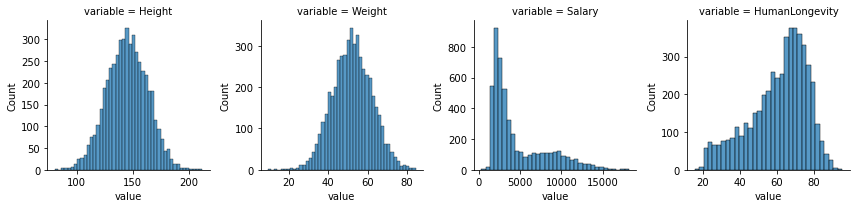

In [10]:
# use seaborn facet grid to create a grid of plots 
g = sns.FacetGrid(cat2, col = "variable", sharex = False, sharey = False)
g.map(sns.histplot, "value");
# y-axis dapat dari values
# Utk height--> ada yg almost zero sbb ada baby

# Height shows normal distribution (bell-shaped)
# Salary is skewed to the right
# kurtosis = height towards the tail

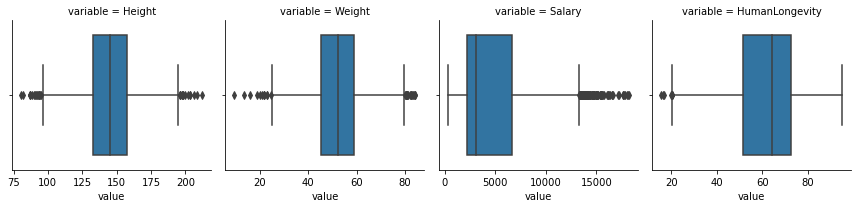

In [13]:
g = sns.FacetGrid(cat2, col = "variable", sharex = False)
g.map(sns.boxplot, "value", order = cat2.variable.unique());

From the histograms, we see **two** main things:
1. The general shape of each distribution is roughly similar in the sense that they all resemble a *mountain* of sorts. The location of the peaks vary from one variable to the next - <code>Height</code> and <code>Weight</code> seem to have the peak closer to the middle of the data, whereas the peaks for <code>HumanLongevity</code> and <code>Salary</code> are further to the right and left respectively. This feature is called **skewness**.
2. The heights towards the tail ends of the graphs are different. Though they may look similar in the plots, note that the y-axes are of *different scale* for the different variables. This feature is called **kurtosis**.

Before we take a deeper look at each of these features and how they impact our analysis, we need to first familiarize ourselves with the concept of **normality**.

## The Normal Distribution:
A **Normal** distribution holds the following properties:
1. It forms a **bell-shaped** curve.
2. It is **symmetric** about the center.

![](../images/normal.bmp)

The normal distribution is particularly interesting because one major assumption for most statistical modeling techniques is **normality**, i.e. the tendency for a set of data to be normally distributed. As such, having a variable that isn't normally distributed may limit the choice of tools we have at our disposal to model the data.

Mathematically, the bell curve of a normal distribution is given by the formula:

$$f(\mu | \sigma^2) = {\frac{1}{\sqrt{2 \pi \sigma^2}}e^{- \frac{(x - \mu)^2}{2 \sigma^2}} } $$

where $\mu$ is the **mean** and $\sigma^2$ is the **variance**. One special case of this distribution is the **standard normal** distribution, where $\mu = 0$ and $\sigma = 1$.

In [ ]:
x = np.linspace(-6, 6, 100000)
plt.plot(x, norm.pdf(x));

Adjusting the values of the **parameters** $\mu$ and $\sigma$ modifies the shape of the distribution by varying the center and strech of the plot as illustrated below:

In [ ]:
x = np.linspace(-20, 20, 100000)
for i in (-2, 2, 8):
    plt.plot(x, norm.pdf(x, loc = i, scale = 3), label = f"$\mu={i}, \sigma=3$")
plt.legend()
plt.title('Effect of Changing the Mean of a Normal Distribution');

In [ ]:
x = np.linspace(-15, 15, 100000)
for i in (1, 3, 5):
    plt.plot(x, norm.pdf(x, loc = 0, scale = i), label = f"$\mu=0, \sigma={i}$")
plt.legend()
plt.title('Effect of Changing the Standard Deviation of a Normal Distribution');

As we can see, increasing/decreasing the mean shifts the axis of symmetry for the curve to the right/left, whereas increasing/decreasing the variance/standard deviation streches/contracts the curve. In practice, many real-world measurable variables such as the height and weight of people, IQ, and error in physical measurements are *approximately normal* and can be modeled using a normal distribution using by choosing appropriate parameter values.

One notable property of the normal distribution is that the distribution of data within its range is prescribed in terms of the standard deviation. This property is known as the **Empirical Rule**:
*For a data set that is normally distributed, the following hold true*:
1. 68% of the data lies within **one** standard deviation of the mean.
2. 95% of the data lies within **two** standard deviations of the mean.
3. 99.7% of the data lies within **three** standard deviations of the mean.

![](../images/StdRule.png)

#### <div class = "alert alert-block alert-info"> <b>Example</b>
<p>
The battery life of a cell phone is normally distributed with a mean of 40 hours of audio playback with a standard deviation of 1.5 hour. What percentage of these cell phones have battery life: <p>
    1. between (37,43)<p>
    2. less than 44.5<p>
    3. At least 41.5<p>
    4. less than 40<p>
    5. More than 40<p>
</div>

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Distribution of blood pressure can be approximated as a normal distribution with mean 85 mm. and standard deviation 20 mm. What is the percentage of the people who have blood pressure:<p>
    1. between (65, 105)<p>
    2. less than 125<p>
    3. At most 85<p>
    4. More than 85<p>
    5. At least 65<p>
</div>

<div class = "alert alert-block alert-danger">
<b>Challenging Exercise</b>
<p>
Zack takes the SAT and his best friend Nick takes the ACT. Zack’s SAT math score is 590, and Nick’s ACT math score is 27. SAT math scores in the county are normally distributed, with a mean of 500 and a standard deviation of 100. ACT math scores in the county are also normally distributed, with a mean of 18 and a standard deviation of 6. Assuming that both tests measure the same kind of ability, who has the better score?
</div>

## Skewness
Skewness is a measure of **asymmetry** in the distribution of a given set of data. A given variable can be classified as either:
1. **Symmetric:** The distribution of data is mirrored evenly along both sides of the median. Also known as *unskewed*.
2. **Negatively Skewed:** The distribution of data is heavier to the right side of the graph, with the left side tapering off in an elongated tail. Also known as *skewed to the left*.
3. **Positively Skewed:** The distribution of data is heavier to the left side of the graph, with the right side tapering off in an elongated tail. Also known as *skewed to the right*.

![](../images/skew.png)

In cases where the degree of skewness is minute, visual inspection can be difficult to carry out. To make the process of identifying the skewness of a distribution easier, most statistical texts refer to the following *rule of thumb*:
1. If the distribution is **symmetric**, the mean is **equal to** the median.
2. If the distribution is **negatively skewed**, the mean is **less than** the median.
3. If the distribution is **positively skewed**, the mean is **greater than** the median.

Using this rule of thumb, let's examine the distributions in the data sets we loaded earlier.

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
Overlay vertical lines on the plots to indicate where the <b>mean</b> and <b>median</b> lies for each data set. Based on the result, what is the skewness of each variable?
</div>    

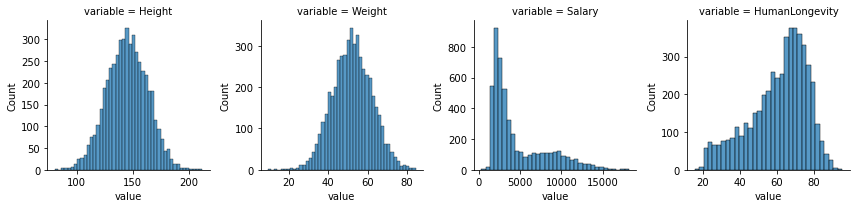

In [14]:
g = sns.FacetGrid(cat2, col = "variable", sharex = False, sharey = False)
g.map(sns.histplot, "value")

In [15]:
cat2

,variable,value
0,Height,146.582249
1,Height,158.932600
2,Height,176.280966
3,Height,129.059825
4,Height,113.891937
...,...,...
19995,HumanLongevity,37.741355
19996,HumanLongevity,50.551949
19997,HumanLongevity,29.470856
19998,HumanLongevity,37.598353


In [16]:
summ_cat2 = cat2.groupby("variable").agg(['mean', 'median'])
summ_cat2

value             
                       mean       median
variable                                
Height           145.080726   145.216642
HumanLongevity    60.798528    64.290070
Salary          4673.328586  3110.957869
Weight            52.199081    52.122857

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

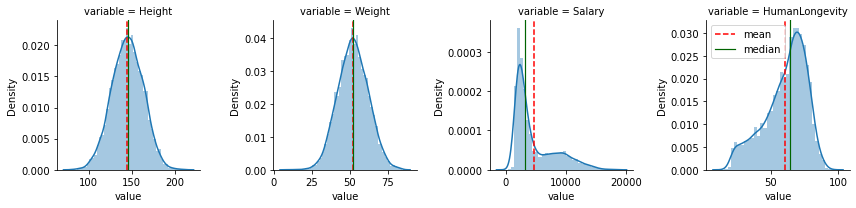

In [17]:
g = sns.FacetGrid(cat2, col = "variable", sharex = False, sharey = False)
g.map(sns.distplot, "value")
ax = g.axes[0]
i=0
for axis in ax:
    axis.axvline(x = summ_cat2['value']['mean'][files[i]], c = 'red', label = "mean", linestyle='dashed')
    axis.axvline(x = summ_cat2['value']['median'][files[i]], c = 'darkgreen', label = "median",linewidth=1.2)
    i=i+1
plt.legend()
plt.show()

We see that `Height` and `Weight` are symmetric, with `HumanLongevity` being negatively skewed and salary being positively skewed. The first two variables are known to be normally distributed, whereas the skewness visible in our human longevity and salary data can be attributed to advancement in medical care over the years and a widening income gap between lower and upper class society.

To get a better picture of the distribution for each variable, let's add on boxplots to see how much of an impact extreme values have on each set of data.

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
1. Add vertical lines for Q1, Q3, and the lower and upper fences to the above histograms to show the presence of outliers (if any).
<p>
2. Generate relevant boxplots for comparison with the histograms.
</div>   

In [18]:
q1 = lambda x: x.quantile(.25)
q3 = lambda x: x.quantile(.75)
lf = lambda x: q1(x) - 1.5 * iqr(x)
uf = lambda x: q3(x) + 1.5 * iqr(x)

q1.__name__ = "q1"
q3.__name__ = "q3"
lf.__name__ = "lf"
uf.__name__ = "uf"
summ_cat2 = cat2.groupby("variable", sort = False).agg(['mean', 'median', q1, q3, lf, uf])

In [19]:
summ_cat2

value                                         \
                       mean       median           q1           q3   
variable                                                             
Height           145.080726   145.216642   132.722731   157.736106   
Weight            52.199081    52.122857    45.327432    59.051685   
Salary          4673.328586  3110.957869  2197.076146  6644.741654   
HumanLongevity    60.798528    64.290070    51.565369    72.525004   

                                           
                         lf            uf  
variable                                   
Height            95.202670    195.256168  
Weight            24.741052     79.638065  
Salary         -4474.422117  13316.239917  
HumanLongevity    20.125916    103.964457

In [ ]:
# use Seaborn colour palette RGB values
current_palette = sns.color_palette()
g = sns.FacetGrid(cat2, col = "variable", sharex = False, sharey = False)
g.map(sns.histplot, "value")
ax = g.axes[0]
i = 0 
for axis in ax:
    j = 0 
    for statistic in summ_cat2['value'].columns.values: 
        axis.axvline(x = summ_cat2['value'][statistic][i], c = current_palette[j], label = statistic)
        j += 1
    i += 1
    
plt.legend(loc=0);

In [ ]:
g = sns.FacetGrid(cat2, col = "variable", sharex = False)
g.map(sns.boxplot, "value");

One interesting point to note is that though the rule of thumb works quite easily, it can **fail** in certain cases (most notably with multimodal distributions). Various formulas have been developed over the years to compute skewness with the most common one being the **Adjusted Fisher–Pearson Standardized Moment Coefficient**, $G_1$:

$$G_1 = \frac{\sqrt{n(n-1)}}{n-2}\left[ \frac{\frac{1}{n} \Sigma (x_i - \bar{x})^3}{\left( \frac{1}{n} \Sigma (x_i - \bar{x})^2 \right)^{\frac{3}{2}}} \right]$$

Here $x_i$ represents the *i*-th data point, $\bar{x}$ is the sample mean, and $n$ is the sample size. For the sake of brevity, we will automate evaluation of this formula using the `skew` method for Pandas objects and the `scipy.stats.skew` function. 

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
Using the <code>skew</code> method for Pandas objects, compute the skewness of the <code>HumanLongevity</code> and <code>Salary</code> data.
</div>    

In [31]:
cat

Height          0       146.582249
                1       158.932600
                2       176.280966
                3       129.059825
                4       113.891937
                           ...    
HumanLongevity  4995     37.741355
                4996     50.551949
                4997     29.470856
                4998     37.598353
                4999     32.792589
Length: 20000, dtype: float64

In [20]:
cat.skew(level = 0)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3464\2573282721.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  cat.skew(level = 0)


Height           -0.040767
Weight            0.007942
Salary            1.289550
HumanLongevity   -0.700171
dtype: float64

Equivalently, use the `skew()` function from `scipy.stats`:

In [ ]:
cat2

In [21]:
cat2.groupby("variable").agg(lambda x: skew(x, bias = False))

,value
variable,
Height,-0.040767
HumanLongevity,-0.700171
Salary,1.289550
Weight,0.007942


If a skewness value of **greater than 1** is obtained in either direction (positive/negative), we say that the distribution is **highly skewed**. A skewness value of 0 represents a **perfectly symmetric** distribution, which in the case of real-world data is close to impossible to observe.

In [ ]:
cat['Height']

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Using <code>scipy.stats.skew</code>, compute the skewness of the <code>Height</code> and <code>Weight</code> data.
</div>    

In [23]:
cat['Height'].skew()

-0.04076711182120856

In [24]:
cat['Weight'].skew()

0.007941805841340308

As expected, the data for `Height` and `Weight` are not perfectly symmetrical. In practice, most distributions you encounter will have *some* degree of skewness, but we consider it to be symmetrical if the value is close to 0.

## Kurtosis
Kurtosis is a measure of *tailedness*, i.e. how heavily the data is saturated in the tails of the distribution as opposed to its center. Visually, kurtosis manifests as either a *shorter* or *taller* distribution along the y-axis. This appearance is mainly due to the tails being *fatter* or *thinner* respectively.

![](../images/leptplat.png)

Kurtosis uses the Normal distribution as a **point of reference**, i.e. it measures how much thinner/fatter the tails of a distribution are *compared to* a Normal distribution.
1. If the kurtosis is **negative** ($<0$), we say the distribution is **platykurtic**. This means its tails are **thinner** than that of a Normal distribution. Visually, platykurtic distributions appear **shorter** in height compared to a Normal distribution.
2. If the kurtosis value is **zero** ($=0$), we say the distribution is **mesokurtic**. This means the thickness of its tails are **identical**/**similar** to that of a Normal distribution.
3. If the kurtosis value is **positive** ($>0$), we say the distribution is **leptokurtic**. This means its tails are **thicker** than that of a Normal distribution. Visually, leptokurtic distributions appear **taller** in height compared to a Normal distribution.

In Python, we can utilize the `scipy.stats.kurtosis` to compute the kurtosis of a given set of data. 

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
Using <code>scipy.stats.kurtosis</code>, compute the kurtosis of the <code>HumanLongevity</code> and <code>Salary</code> data.
</div>    

In [25]:
cat.kurtosis(level = 0)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3464\1252719842.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  cat.kurtosis(level = 0)


Height           -0.074210
Weight           -0.015389
Salary            0.702063
HumanLongevity   -0.203843
dtype: float64

As outliers are commonly seen in the tails, kurtosis can be used as a rough indicator of the presence of outliers - a higher kurtosis value indicates thicker tails, i.e. we are more likely to encounter outliers.

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Using <code>scipy.stats.kurtosis</code>, compute the kurtosis of the <code>Height</code> and <code>Weight</code> data.
</div>    

In [26]:
cat['Height'].kurtosis()

-0.07421007592099693

In [27]:
cat['Weight'].kurtosis()

-0.015389390820611748

Additionally, kurtosis can also be seen in **Normal Quantile-Quantile Plots (Q-Q plots)** - any deviation from the shape of a normal distribution will show as points straying from a diagonal line. In most cases, we use Q-Q plots to validate assumptions of normality before proceeding with advanced statistical analysis.

In [ ]:
cat["Salary"].mean(), cat["Salary"].std()

In [ ]:
np.quantile(cat["Salary"],.01), np.quantile(cat["Salary"],.02), np.quantile(cat["Salary"],.03),np.quantile(cat["Salary"],1)

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fg = qqplot(cat["Salary"], fit = True, line = '45')

For comparison, let's take a look at the Q-Q plot for height, which is approximately normal:

In [ ]:
fg = qqplot(cat["Height"], fit = True, line = '45')

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
In `iris` dataset, check the compare the distribution of each numerical variable with normal distribution.
</div> 

In [28]:
iris=pd.read_csv('../data/iris.csv')

In [29]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
skew(iris['Sepal.Length'], bias=0)

0.3149109566369729

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


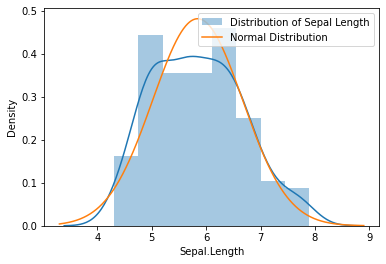

In [41]:
sns.distplot(iris['Sepal.Length'], label='Distribution of Sepal Length')

x = np.linspace(min(iris['Sepal.Length'])-1, max(iris['Sepal.Length'])+1,2000)
y = norm.pdf(x,loc=np.mean(iris['Sepal.Length']),scale=iris['Sepal.Length'].std(ddof=1))
plt.plot(x,y,label='Normal Distribution')
plt.legend(loc='upper right')

In [37]:
print(f"""
Kurtosis Sepal Length:{iris['Sepal.Length'].kurtosis()}
Kurtosis Sepal Width:{iris['Sepal.Width'].kurtosis()}
Kurtosis Petal Length:{iris['Petal.Length'].kurtosis()}
Kurtosis Petal Width:{iris['Petal.Width'].kurtosis()}""")


Kurtosis Sepal Length:-0.5520640413156395
Kurtosis Sepal Width:0.2282490424681929
Kurtosis Petal Length:-1.4021034155217518
Kurtosis Petal Width:-1.340603996612646


In [38]:
print(f"""
Skewness Sepal Length:{iris['Sepal.Length'].skew()}
Skewness Sepal Width:{iris['Sepal.Width'].skew()}
Skewness Petal Length:{iris['Petal.Length'].skew()}
Skewness Petal Width:{iris['Petal.Width'].skew()}""")


Skewness Sepal Length:0.3149109566369728
Skewness Sepal Width:0.31896566471359966
Skewness Petal Length:-0.27488417975101276
Skewness Petal Width:-0.10296674764898116


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


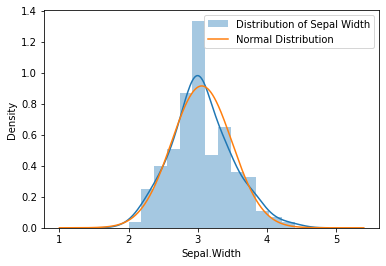

In [46]:
# Haseena
sns.distplot(iris['Sepal.Width'], label='Distribution of Sepal Width')
x = np.linspace(min(iris['Sepal.Width'])-1, max(iris['Sepal.Width'])+1,2000)
y = norm.pdf(x,loc=np.mean(iris['Sepal.Width']),scale=iris['Sepal.Width'].std(ddof=1))
plt.plot(x,y,label='Normal Distribution')
plt.legend(loc='upper right')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


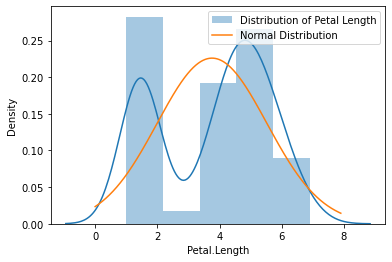

In [47]:
sns.distplot(iris['Petal.Length'], label='Distribution of Petal Length')
x = np.linspace(min(iris['Petal.Length'])-1, max(iris['Petal.Length'])+1,2000)
y = norm.pdf(x,loc=np.mean(iris['Petal.Length']),scale=iris['Petal.Length'].std(ddof=1))
plt.plot(x,y,label='Normal Distribution')
plt.legend(loc='upper right')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


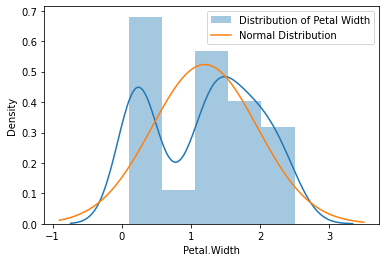

In [48]:
sns.distplot(iris['Petal.Width'], label='Distribution of Petal Width')
x = np.linspace(min(iris['Petal.Width'])-1, max(iris['Petal.Width'])+1,2000)
y = norm.pdf(x,loc=np.mean(iris['Petal.Width']),scale=iris['Petal.Width'].std(ddof=1))
plt.plot(x,y,label='Normal Distribution')
plt.legend(loc='upper right')

## Other Common Distributions <a name="other"></a>

### The Poisson Distribution

If a variable models the number of times an event occurs in a **fixed interval of time or space**, that variable has **Poisson Distribution**. The Poisson distribution is used to describe the distribution of rare events in a large population.

A Poisson distribution:
1. Takes only non-negative numbers.
2. Is defined by the mean, $\lambda$.
3. Each occurrence is independent of the other occurrences.
4. The occurrences in each interval can range from zero to infinity.
5. The mean number of occurrences must be constant throughout the experiment.

For example, if a variable measures the number of:
- Typos on a *printed page*
- Patients who enter an emergency room in *one hour* 
- Customers at a Maybank ATM at Mid Valley Megamall in *10-minute intervals*
- Surface defects on a *new refrigerator*
- Repairs needed on *10 miles of highway*
- Bankruptcies that are filed in *a month*
- Arrivals at a car wash in *one hour*
- Network failures per *day*
- File server virus infection at a data center during a *24-hour period*
- Airbus 330 aircraft engine shutdowns per *100,000 flight hours*
- Asthma patient arrivals in a *given hour at a walk-in clinic*
- Work-related accidents over a *given production time*
- Birth, deaths, marriages, divorces, suicides, and homicides over a *given period of time*
- Customers who call to complain about a service problem per *month*
- Visitors to a web site per *minute*
- Calls to consumer hot line in a *5-minute period*
- Telephone calls per *minute* in a small business

then we say that the variable is Poisson distributed.


If a variable is poisson distributed with mean $\lambda$, its standard deviation will be $\sqrt{\lambda}$. The following figure compares poisson distributions for different means ($\lambda$). It shows when the mean of the distribution increases, the plot moves to the right, its standard deviation increases and its height decreases.

<img src='../images/Poisson.png'>

The figure below compares a Normal distribution with $\mu=9$ and $\sigma=3$ and a Poisson distribution with $\lambda=9$:

<img src='../images/PoissonNormal.png'>

We can see that the Poisson distribution is quite similar to a Normal one, albeit a little more skewed.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
A bank is interested in studying the number of people who use the ATM located outside its office late at night. On average, 1.3 customers walk up to the ATM during any 10 minute interval between 9pm and midnight. Here $\lambda_{10} = 1.3$.
</div>

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
A website receives hits at the rate of 150 per hour. What is the distribution of the number of the calls per hour for this website?
Complete the following code to draw this distribution.
</div>

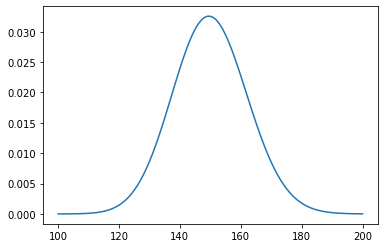

In [49]:
x = np.linspace(100, 200, 101)
plt.plot(x, poisson.pmf(x, mu = 150));
# mean 150 per hour

### The Uniform Distribution

A variable has **Uniform Distribution** if its distribution plot looks like a rectangle or is **heavily multimodal**. This variable has the range between [a,b] but there is no information that would allow us to expect that one outcome is more likely than the others.

For example, if x represents:
- Month of birth of a large group of people
- The day of the week of the hottest day of a year
- The last digit of the ID number
- The number that comes up from the roll of a fair die

The following figure shows uniform distribution plot in range [0,9]:

<img src='../images/UniformDist.png'>

Unlike the Normal and Poisson distributions, the Uniform distribution has **no parameters**, and is instead defined on a **fixed interval**. The figure below illustrates this for a variety of different ranges:

<img src='../images/UniDist.png'>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Suppose in a quiz there are 60 participants. A question is given to all of them and the time allowed to answer it is 25 seconds. The response time of each student can be any number between 0 (immediately) to 25 seconds. We can assume the response time is uniformely distributed since any respond time from 0 to and including 25 seconds is equally likely.
</div>

 The following code draws the distribution of the response time in the above example:

In [ ]:
a=0
b=25
x = np.linspace(a-10, b+10, 60)
plt.plot(x, uniform.pdf(x, loc = a, scale = b-a))
plt.title('Uniform Distribution of Response Time [{},{}]'.format(a,b));

In [ ]:
a=10
b=25
x = np.linspace(0, 30, 60)
plt.plot(x, uniform.pdf(x, loc = a, scale = b-a)) # loc=min, scale=max-min
plt.title('Uniform Distribution of Response Time [{},{}]'.format(a,b))

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
Load the file <code>Smile.csv</code> which contains the smiling times (in seconds) of 50 individuals in seconds, of an twelve-week old baby. Compute the five figure summary and draw a histogram with vertical lines to indicate the mean, median, first and third quartiles, and the upper and lower fences.
</div>

In [50]:
smile = pd.read_csv("../data/Smile.csv")

In [51]:
smile.head()

,Smile
0,18.86
1,24.31
2,15.69
3,7.55
4,6.82


In [ ]:
smile.info()

In [ ]:
smile.describe()

In [52]:
summ_smile = smile.agg([q1, q3, 'mean', 'median', lf, uf])
summ_smile

,Smile
q1,7.3625
q3,19.0925
mean,13.1068
median,12.7450
lf,-10.2325
uf,36.6875


NameError: name 'current_palette' is not defined

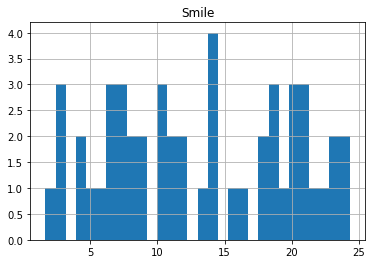

In [53]:
ax = plt.subplot()
smile.hist(bins = 30, ax = ax)

for i in range(len(summ_smile.index.values)): 
    index = summ_smile.index.values[i]
    ax.axvline(summ_smile.loc[index, "Smile"], label = index, c = current_palette[i])

ax.legend();

## Additional Reading

1. Nancy R. Tague (2005). The Quality Toolbox. Summary of Histogram section available [here](http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/histogram2.html).